<a href="https://colab.research.google.com/github/Amr0093/Amr0093/blob/main/deeplizard_course_patientmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***import numpy, random number generator,and sklearn (minmaxscaler)***

In [ ]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

## ***preprocessor data for training in keras***

In [ ]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

### ***show the train sample data***

In [ ]:
for i in train_samples:
    print(i)

19
97
60
96
15
90
15
66
20
81
28
73
21
75
47
92
17
92
52
79
31
69
51
81
18
82
54
72
30
69
51
77
35
74
37
75
22
73
15
70
43
93
38
74
41
73
52
80
27
74
29
80
57
74
57
66
60
69
56
65
46
100
30
96
60
67
46
91
64
95
27
75
50
71
30
92
55
76
59
94
47
78
45
96
59
87
33
99
39
96
19
71
37
83
56
94
60
72
60
89
44
96
55
84
49
99
16
98
48
78
54
65
34
89
25
66
46
66
50
94
13
68
32
92
51
72
39
75
25
75
35
82
57
92
30
89
26
69
55
98
55
92
37
70
55
87
19
98
59
84
36
77
16
78
28
86
55
83
19
84
38
81
42
90
52
67
49
70
15
77
58
96
41
87
34
96
29
82
27
84
36
68
57
92
43
76
22
69
14
99
42
82
21
67
28
78
58
71
16
84
20
100
29
70
59
82
51
84
36
75
46
93
26
90
23
96
31
70
31
72
57
98
59
65
39
97
44
76
40
97
34
92
24
89
19
85
33
92
27
66
26
71
52
65
23
79
30
71
47
67
23
75
15
94
34
80
32
93
43
80
29
88
32
99
27
89
59
95
57
67
37
75
23
84
64
92
29
80
54
82
21
99
18
85
33
91
50
92
48
88
50
95
40
99
30
84
52
98
61
100
45
80
24
84
50
100
59
94
57
74
60
65
55
79
53
84
17
71
20
85
45
75
59
86
34
99
32
78
44
77
38
73


### create num py array as keras only take numpy *array*

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

i used numpy array as the model was set by default to accept numpy array


- i will used minmaxscaler 3shan el model haya5d wa2t twel 3shan ytdrb 3la data mn 13 to 100

### ***scale down the data to let the model learn faster but remember the input to it is a numpy array***

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

### ***print the data but after being scaled down***

In [ ]:
for i in scaled_train_samples:
    print(i)

[0.06896552]
[0.96551724]
[0.54022989]
[0.95402299]
[0.02298851]
[0.88505747]
[0.02298851]
[0.6091954]
[0.08045977]
[0.7816092]
[0.17241379]
[0.68965517]
[0.09195402]
[0.71264368]
[0.3908046]
[0.90804598]
[0.04597701]
[0.90804598]
[0.44827586]
[0.75862069]
[0.20689655]
[0.64367816]
[0.43678161]
[0.7816092]
[0.05747126]
[0.79310345]
[0.47126437]
[0.67816092]
[0.1954023]
[0.64367816]
[0.43678161]
[0.73563218]
[0.25287356]
[0.70114943]
[0.27586207]
[0.71264368]
[0.10344828]
[0.68965517]
[0.02298851]
[0.65517241]
[0.34482759]
[0.91954023]
[0.28735632]
[0.70114943]
[0.32183908]
[0.68965517]
[0.44827586]
[0.77011494]
[0.16091954]
[0.70114943]
[0.18390805]
[0.77011494]
[0.50574713]
[0.70114943]
[0.50574713]
[0.6091954]
[0.54022989]
[0.64367816]
[0.49425287]
[0.59770115]
[0.37931034]
[1.]
[0.1954023]
[0.95402299]
[0.54022989]
[0.62068966]
[0.37931034]
[0.89655172]
[0.5862069]
[0.94252874]
[0.16091954]
[0.71264368]
[0.42528736]
[0.66666667]
[0.1954023]
[0.90804598]
[0.48275862]
[0.72413793]
[0.

### ***as i'm using keras2 so i must use tf.keras***

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### ***creating a sequential moadel which is like ana array an each element is a layer***

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
]) 

### ***print a summary for holding each layer and its description (width,height,depth)***

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


***after you are confident that your model is created you need to compile and determine
1-optimizer
2-loss fumction
3-accuracy metrics ***

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### ***fit ia used to fit all the data in the ram and if we comile again it doesn't reload the set but it just updates the weight and thus it may cause overfitting***

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
210/210 - 0s - loss: 0.6729 - accuracy: 0.5619
Epoch 2/20
210/210 - 0s - loss: 0.6470 - accuracy: 0.5933
Epoch 3/20
210/210 - 0s - loss: 0.6192 - accuracy: 0.6586
Epoch 4/20
210/210 - 0s - loss: 0.5923 - accuracy: 0.7119
Epoch 5/20
210/210 - 0s - loss: 0.5652 - accuracy: 0.7476
Epoch 6/20
210/210 - 0s - loss: 0.5379 - accuracy: 0.7829
Epoch 7/20
210/210 - 0s - loss: 0.5108 - accuracy: 0.8057
Epoch 8/20
210/210 - 0s - loss: 0.4843 - accuracy: 0.8267
Epoch 9/20
210/210 - 0s - loss: 0.4588 - accuracy: 0.8371
Epoch 10/20
210/210 - 0s - loss: 0.4349 - accuracy: 0.8552
Epoch 11/20
210/210 - 0s - loss: 0.4128 - accuracy: 0.8695
Epoch 12/20
210/210 - 0s - loss: 0.3928 - accuracy: 0.8748
Epoch 13/20
210/210 - 0s - loss: 0.3746 - accuracy: 0.8833
Epoch 14/20
210/210 - 0s - loss: 0.3583 - accuracy: 0.8981
Epoch 15/20
210/210 - 0s - loss: 0.3440 - accuracy: 0.8986
Epoch 16/20
210/210 - 0s - loss: 0.3315 - accuracy: 0.9129
Epoch 17/20
210/210 - 0s - loss: 0.3206 - accuracy: 0.9143
Epoch 

### ***i'm fitting the model in the ram but this time with the validation set ***

---



the validation set i did not create but it's creating by the fit by assigning 10 % of the all data set and also not that the shuffle will not work on them

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
189/189 - 0s - loss: 0.3006 - accuracy: 0.9212 - val_loss: 0.2020 - val_accuracy: 0.9762
Epoch 2/20
189/189 - 0s - loss: 0.2965 - accuracy: 0.9243 - val_loss: 0.1954 - val_accuracy: 0.9762
Epoch 3/20
189/189 - 0s - loss: 0.2930 - accuracy: 0.9254 - val_loss: 0.1891 - val_accuracy: 0.9762
Epoch 4/20
189/189 - 0s - loss: 0.2898 - accuracy: 0.9291 - val_loss: 0.1835 - val_accuracy: 0.9762
Epoch 5/20
189/189 - 0s - loss: 0.2872 - accuracy: 0.9243 - val_loss: 0.1788 - val_accuracy: 0.9810
Epoch 6/20
189/189 - 0s - loss: 0.2848 - accuracy: 0.9259 - val_loss: 0.1744 - val_accuracy: 0.9810
Epoch 7/20
189/189 - 0s - loss: 0.2828 - accuracy: 0.9323 - val_loss: 0.1697 - val_accuracy: 0.9810
Epoch 8/20
189/189 - 0s - loss: 0.2810 - accuracy: 0.9328 - val_loss: 0.1663 - val_accuracy: 0.9810
Epoch 9/20
189/189 - 0s - loss: 0.2792 - accuracy: 0.9333 - val_loss: 0.1630 - val_accuracy: 0.9810
Epoch 10/20
189/189 - 0s - loss: 0.2777 - accuracy: 0.9339 - val_loss: 0.1594 - val_accuracy: 0.9810

### ***creating the test data***

In [ ]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)




### ***creating 2 numpy list for the test data***

In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)


### ***scalling the test data down cause the model can learn from it or test it better***

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### ***creating predictions in keras which takes the dataset but not the label***

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

### ***printing the predictions by percentages***

In [ ]:
for i in predictions:
    print(i)

[0.90872514 0.09127489]
[0.19940686 0.80059314]
[0.47788554 0.5221145 ]
[0.23075055 0.76924944]
[0.90521073 0.09478928]
[0.26538768 0.73461235]
[0.8532333  0.14676675]
[0.04464459 0.9553554 ]
[0.84261197 0.15738803]
[0.06347705 0.9365229 ]
[0.90639544 0.09360454]
[0.08221654 0.9177835 ]
[0.90814763 0.09185236]
[0.03735286 0.96264714]
[0.6787769  0.32122308]
[0.17137225 0.82862777]
[0.8854838  0.11451618]
[0.13530758 0.86469245]
[0.84261197 0.15738803]
[0.34382445 0.6561755 ]
[0.8915337  0.10846632]
[0.05816975 0.9418303 ]
[0.910438   0.08956199]
[0.3868981  0.61310196]
[0.84261197 0.15738802]
[0.18497936 0.8150206 ]
[0.9015757  0.09842431]
[0.28390205 0.71609795]
[0.6369683  0.36303172]
[0.12479486 0.8752051 ]
[0.8915337  0.10846632]
[0.06347705 0.9365229 ]
[0.9040126  0.09598742]
[0.12479486 0.8752051 ]
[0.81635803 0.18364191]
[0.24766308 0.7523369 ]
[0.89640117 0.10359886]
[0.32316586 0.67683417]
[0.90971464 0.09028532]
[0.32316586 0.67683417]
[0.7179031  0.28209692]
[0.09738026 0.90

### ***creating and printing the rounded prediction from percentage form to binary form ***

In [ ]:
rounded_predictions = model.predict_classes(x=scaled_test_samples, batch_size=10, verbose=0)

for i in rounded_predictions:
    print(i)

0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1


### ***Plotting A Confusion Matrix***

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

### ***we will pass to the confusion matrix,the test labels and the predictions so we can illustrate the predictions and make them readable***

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

### ***function plot the confusion matrix***

In [ ]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### ***plotting labels***

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']

### ***i think it's for calling the function***

Confusion matrix, without normalization
[[191  19]
 [  9 201]]


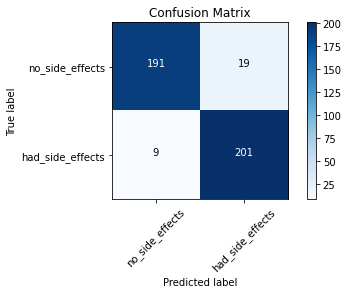

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### ***the last thing to do in the patient course model is how to save the model and this can be done us ing three methods ***

### ***method1: save model architecture, the weigths and the optimizer value***

In [ ]:
model.save('sample_model.h5')

### ***load the saved model ***

In [ ]:
from keras.models import load_model
new_model = load_model('sample_model.h5')

### ***method2: save model architecture only using json***

In [ ]:
json_string = model.to_json()


### ***print the json string to see what is in it***

In [ ]:
json_string

### ***load the data from json string***

In [ ]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

### ***method3: save the weights ***

In [ ]:
model.save_weights('my_model_weights.h5')

### ***to load the saved weights , it needs to be saved in a similar model ***

In [ ]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('my_model_weights.h5')